## 0. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## 1. Get data from a previosly made function

In [2]:
from preparation import prepare_data

PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   header            4699 non-null   object             
 1   title             4699 non-null   object             
 2   titleUrl          4691 non-null   object             
 3   subtitles         3992 non-null   object             
 4   time              4699 non-null   datetime64[ns, UTC]
 5   products          4699 non-null   object             
 6   activityControls  4699 non-null   object             
 7   description       654 non-null    object             
 8   details           663 non-null    object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 330.5+ KB


,video_title,channel_name,time
0,Alvan & Ahez - Fulenn - LIVE - France 🇫🇷 - Gra...,Eurovision Song Contest,2022-07-11 19:32:31.801000+03:00
1,Monika Liu - Sentimentai - LIVE - Lithuania 🇱🇹...,Eurovision Song Contest,2022-07-11 19:28:54.894000+03:00
2,Ochman - River - LIVE - Poland 🇵🇱 - Grand Fina...,Eurovision Song Contest,2022-07-11 19:26:22.578000+03:00
3,Zdob şi Zdub & Advahov Brothers - Trenulețul -...,Eurovision Song Contest,2022-07-11 19:22:41.498000+03:00
4,"""In Honolulu"" - German Sailor Song",Ingen,2022-07-11 19:06:04.511000+03:00


## 2. Time to explore! 

In [3]:
counts = df["channel_name"].value_counts()
counts

Eurovision Song Contest     181
STERNENKO                   171
Adam Something               75
Beau of the Fifth Column     66
Sky News                     64
                           ... 
Om TV                         1
ANNEKSIYA NET                 1
ACG                           1
The Mighty Jingles            1
АрміяInform                   1
Name: channel_name, Length: 1039, dtype: Int64

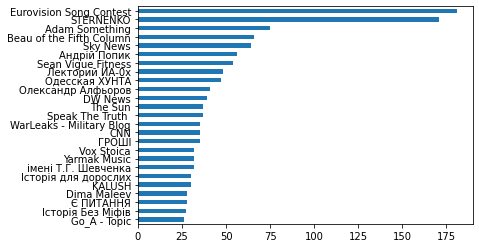

In [4]:
# Plot first n-rows
plt.rcParams['figure.dpi'] = 150 # make your graph bigger

ax = counts.iloc[:25].plot(kind="barh")
ax.invert_yaxis()

In [5]:
df["time"]
pd.DatetimeIndex(df['time']).hour # get hour from datetime

Int64Index([19, 19, 19, 19, 19, 18, 18, 17, 15, 15,
            ...
            13, 13, 13, 13, 13, 13, 13, 13, 12, 12],
           dtype='int64', name='time', length=3992)

In [6]:
# Europe/Kiev
df.info()
df["time"] = df["time"].dt.tz_convert('Europe/Kiev')
df["time"]
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype                      
---  ------        --------------  -----                      
 0   video_title   3992 non-null   string                     
 1   channel_name  3992 non-null   string                     
 2   time          3992 non-null   datetime64[ns, Europe/Kiev]
dtypes: datetime64[ns, Europe/Kiev](1), string(2)
memory usage: 93.7 KB


,video_title,channel_name,time
0,Alvan & Ahez - Fulenn - LIVE - France 🇫🇷 - Gra...,Eurovision Song Contest,2022-07-11 19:32:31.801000+03:00
1,Monika Liu - Sentimentai - LIVE - Lithuania 🇱🇹...,Eurovision Song Contest,2022-07-11 19:28:54.894000+03:00
2,Ochman - River - LIVE - Poland 🇵🇱 - Grand Fina...,Eurovision Song Contest,2022-07-11 19:26:22.578000+03:00
3,Zdob şi Zdub & Advahov Brothers - Trenulețul -...,Eurovision Song Contest,2022-07-11 19:22:41.498000+03:00
4,"""In Honolulu"" - German Sailor Song",Ingen,2022-07-11 19:06:04.511000+03:00
...,...,...,...
3987,We Are Number One - Lazy Town [Saxophone Cover],Daniele Vitale Sax,2022-04-06 13:40:30.876000+03:00
3988,Учасники «Чорнобаївського серіалу» боронять Ми...,АрміяInform,2022-04-06 13:33:50.430000+03:00
3989,Звірства росіян у Бородянці. Катування мирних ...,STERNENKO,2022-04-06 13:03:25.129000+03:00
3990,"ЧОМУ НЕ БУВАЄ ""ХАРОШИХ РУССКИХ""?",Загін Кіноманів,2022-04-06 12:36:08.058000+03:00
